In [1]:
# Useful starting lines
%matplotlib inline
import copy
import numpy as np 
#import matplotlib as mpl
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import re
import glob
import ast
from datetime import datetime
from collections import Counter
import itertools
import nltk
nltk.download("stopwords")
from nltk import bigrams 
from nltk.corpus import stopwords
import string
import locale
import reverse_geocoder as rg
import multiprocessing as mp
import dask.dataframe as dd
locale.setlocale(locale.LC_TIME, "en_US.utf8")
%load_ext autoreload

[nltk_data] Downloading package stopwords to /home/servan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
y_start = pd.read_pickle("states_2m.pkl")

In [28]:
Y = y_start.loc[:]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
list(le.classes_)
Y = le.transform(Y)

In [4]:
x_start = pd.read_pickle("vec_sent_2m.pkl")

In [29]:
X = x_start.loc[:,0:699]
np.shape(X)
X

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.228920,-0.011085,-0.118330,0.110070,-0.171180,0.255810,-0.184450,-0.078979,-0.313170,-0.007866,...,0.093540,-0.215450,-0.136050,-0.137410,-0.197610,-0.378100,-0.288470,-0.009192,-0.022358,-0.305020
2,-0.068295,0.083223,0.006091,-0.062280,-0.096821,0.077772,0.031682,0.165680,-0.064688,-0.080400,...,-0.014531,0.096416,-0.025053,0.032431,-0.111040,-0.003132,-0.073962,0.049476,-0.028385,-0.071172
3,-0.105770,-0.162110,0.179520,-0.089855,-0.056543,0.054632,-0.065880,-0.122650,-0.133870,-0.096578,...,0.064832,-0.184900,0.098573,-0.046791,-0.144410,-0.073196,-0.085059,-0.101970,0.082638,-0.047331
4,-0.036480,0.036188,-0.043832,0.035701,-0.063674,0.163410,-0.117860,0.099406,-0.083573,-0.306800,...,-0.065681,0.116660,-0.139250,-0.221780,-0.138370,-0.065492,0.034897,0.056115,0.058556,-0.067837
5,-0.031676,0.282060,-0.179690,0.217730,0.167860,0.045774,0.043280,0.454980,0.023582,-0.134420,...,-0.035970,-0.204400,-0.022884,0.178950,-0.079366,-0.300200,-0.011448,-0.043911,-0.285490,-0.092163
6,0.017729,0.012803,-0.076673,-0.017672,-0.064711,0.065546,0.024125,0.111340,0.005053,-0.083017,...,-0.042570,-0.080103,-0.059594,0.055684,-0.168900,-0.079128,-0.069662,-0.066770,0.124230,0.022378
7,-0.041017,0.194870,-0.231420,-0.117840,-0.000796,0.130670,-0.097390,-0.032778,-0.149750,0.031717,...,-0.135490,0.006367,0.007220,-0.041312,-0.085666,0.085425,-0.087579,0.140930,-0.019730,-0.004152
8,-0.033059,0.051477,-0.018367,-0.039876,-0.045761,0.121850,-0.020063,0.030889,-0.140060,-0.096144,...,-0.056754,0.006391,0.106390,-0.132840,-0.151230,0.022477,-0.182190,0.000033,-0.076487,-0.061352
9,-0.087181,0.283040,-0.017875,-0.145440,-0.095015,0.055309,-0.146650,0.002319,-0.181630,-0.115980,...,-0.188510,-0.179350,0.198660,0.174280,-0.211300,0.122940,-0.133450,-0.156470,-0.040925,-0.114070


In [30]:
#http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
import multiprocessing as mp

h = .02  # step size in the mesh

names = ["Nearest Neighbors", 
         "Linear SVM", 
         #"RBF SVM", 
         "Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         #"Neural Net", 
         #"AdaBoost",
         "Naive Bayes", 
         "QDA"]

n_estimators=10

classifiers = [
    KNeighborsClassifier(3,n_jobs=mp.cpu_count()-1),
    #SVC(kernel="linear", C=0.025,n_jobs=mp.cpu_count()-1),
    #OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='auto'), 
                                         # max_samples=1.0 / n_estimators, n_estimators=n_estimators),
                       #n_jobs=mp.cpu_count()-1),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0),n_jobs=mp.cpu_count()-1),
    #DecisionTreeClassifier(max_depth=5,n_jobs=mp.cpu_count()-1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,n_jobs=mp.cpu_count()-1),
    #MLPClassifier(alpha=1),
    #AdaBoostClassifier(),
    #GaussianNB(n_jobs=mp.cpu_count()-1),
    #QuadraticDiscriminantAnalysis(n_jobs=mp.cpu_count()-1)
]

"""
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
"""

Automatically created module for IPython interactive environment


'\nX, y = make_classification(n_features=2, n_redundant=0, n_informative=2,\n                           random_state=1, n_clusters_per_class=1)\nrng = np.random.RandomState(2)\nX += 2 * rng.uniform(size=X.shape)\nlinearly_separable = (X, y)\n\ndatasets = [make_moons(noise=0.3, random_state=0),\n            make_circles(noise=0.2, factor=0.5, random_state=1),\n            linearly_separable\n            ]\n'

In [31]:
datasets = [list([X,Y])]

(120000, 700)
(80001, 700)
(120000,)
(80001,)
2
3


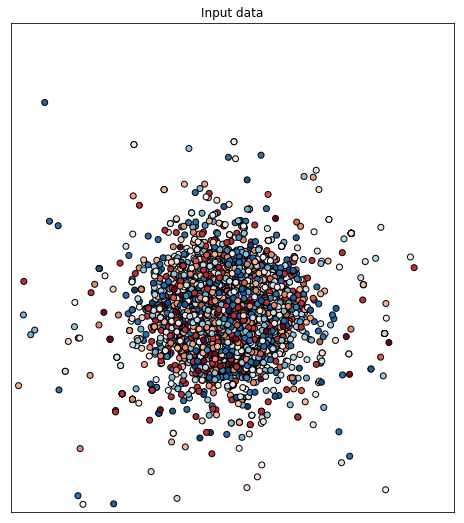

In [32]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    print(np.shape(X_train))
    print(np.shape(X_test))
    print(np.shape(y_train))
    print(np.shape(y_test))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm,
               edgecolors='k')
    # and testing points
    #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               #edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    #print(np.shape(np.c_[xx.ravel(),yy.ravel()]))
    scores = []
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        print(i)
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)
        """
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        """
        i += 1

#plt.tight_layout()
#plt.show()

In [33]:
scores

[0.059274259071761606, 0.12118598517518531]

In [41]:
a,b = datasets[0]

In [42]:
np.shape(a)

(100, 2)

In [43]:
np.shape(b)

(10001,)

In [44]:
a

array([[-0.17749658,  0.93049627],
       [ 1.97742406,  1.76615529],
       [ 1.80002379,  1.7003428 ],
       [-0.77083686,  2.35916348],
       [-0.30800901,  1.59406316],
       [ 0.61472141,  2.43489824],
       [ 1.0909431 ,  2.21663402],
       [-0.83488954,  2.35868875],
       [ 2.47946499,  1.33418967],
       [ 1.19926597,  1.82681392],
       [ 2.18506184,  0.8226875 ],
       [ 1.68423203,  1.0411311 ],
       [ 1.14621135,  2.07048527],
       [ 1.35596945,  0.56802498],
       [ 1.38520748,  1.82607238],
       [ 1.86729217,  1.18692699],
       [ 0.31227376,  2.24605353],
       [-0.08183484,  1.70065511],
       [ 0.90484472,  2.60683016],
       [-0.4358609 ,  2.0151414 ],
       [ 0.81441196,  2.13546784],
       [ 3.10874312,  2.26786504],
       [-0.25574217,  1.71281146],
       [ 1.88663027,  2.72089513],
       [ 2.29503547,  3.89267759],
       [-0.11415626,  0.85593357],
       [ 1.69703537,  3.47717799],
       [ 1.83855775,  0.92667213],
       [ 1.60298807,